In [87]:
from longi_class import LongitudinalAnalysis as la
import analysis_functions as af
lon = la('test')
names = af.assemble_names('/home/dprotter/Downloads/Sex_Differences_CSV')
round_files = [file for file in sorted(names) if 'round' in file]
for file in round_files:
    lon.add_by_round_csv(file)

/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/dprotter/Documents/Vole Projects/Operant_Daily_Pipeline/longi_class.py:282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['file'] = file


In [88]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [89]:
def make_violin(df, day = None, violin_color = None, swarm_color = 'black', ax = None):
    

    if not ax:
        fig, ax = plt.subplots(ncols = 1, nrows = 1)
    else:
        sns.violinplot(y = df.value[~np.isnan(df.value)], bw = 0.25, color = violin_color, ax = ax)
        sns.swarmplot(y = df.value[~np.isnan(df.value)], ax = ax, color = swarm_color)
        ax.set_title(day)
    return ax

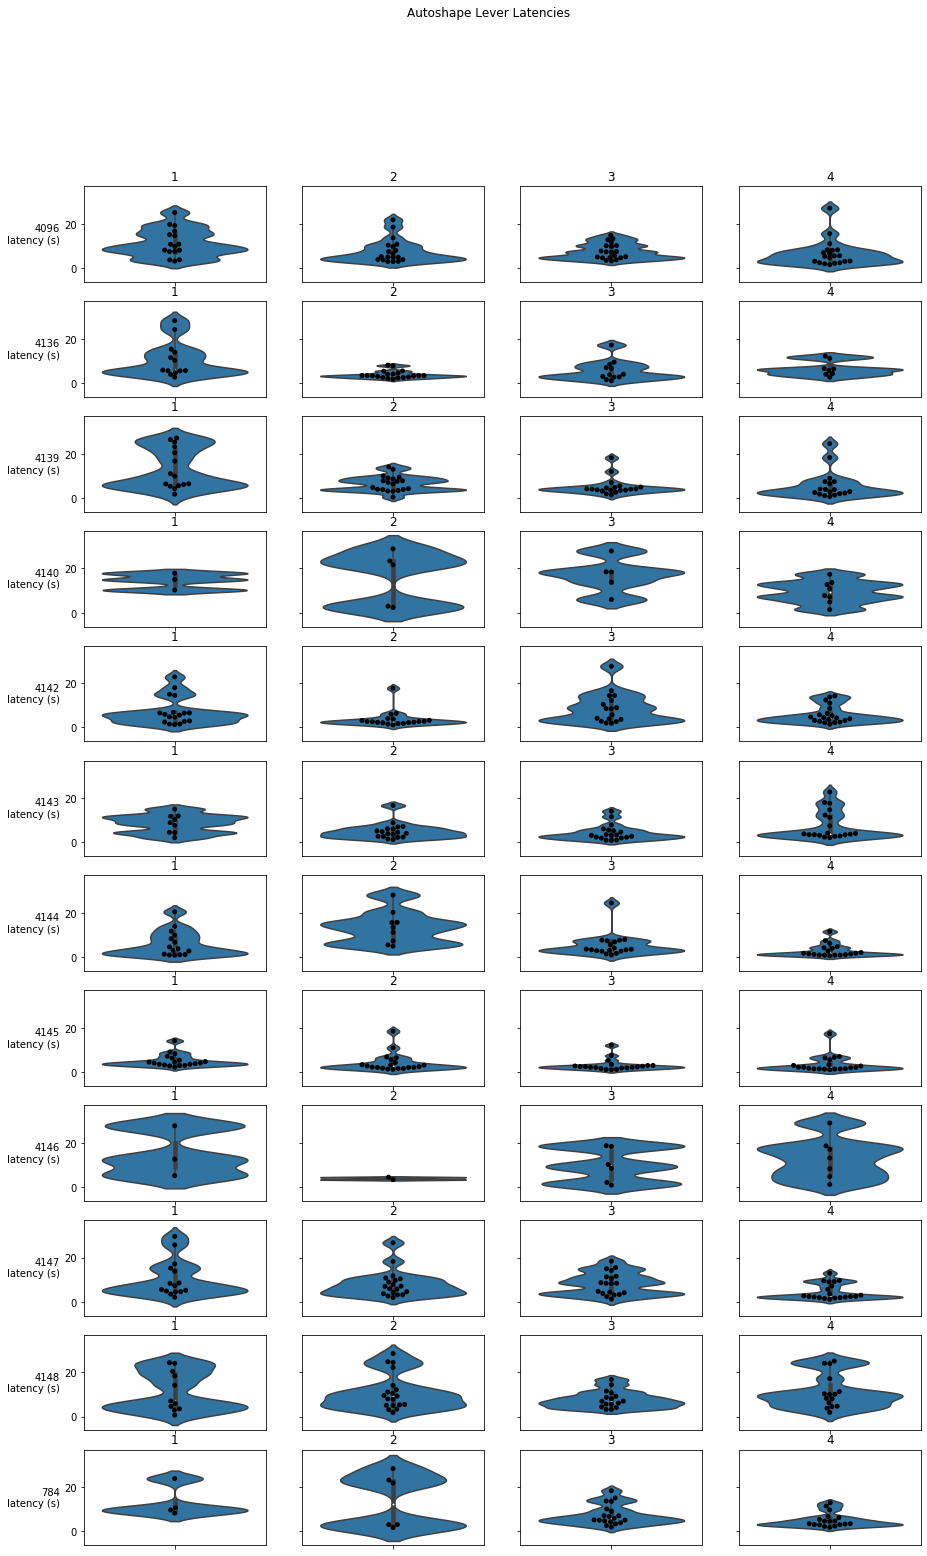

In [90]:
data = lon.metrics['food_lever_press_latency'].get_data("Autoshape")

fig, axs = plt.subplots(ncols = 4, nrows = 12, figsize = (15,25), sharey = True)

fig.suptitle('Autoshape Lever Latencies')
for i, ani in enumerate(data.keys()):
    for day in data[ani].keys():
        this_ax = axs[i][int(day)-1]
        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax)
        if day == '1':
            this_ax.set_ylabel(f'{ani}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')
        
        
        


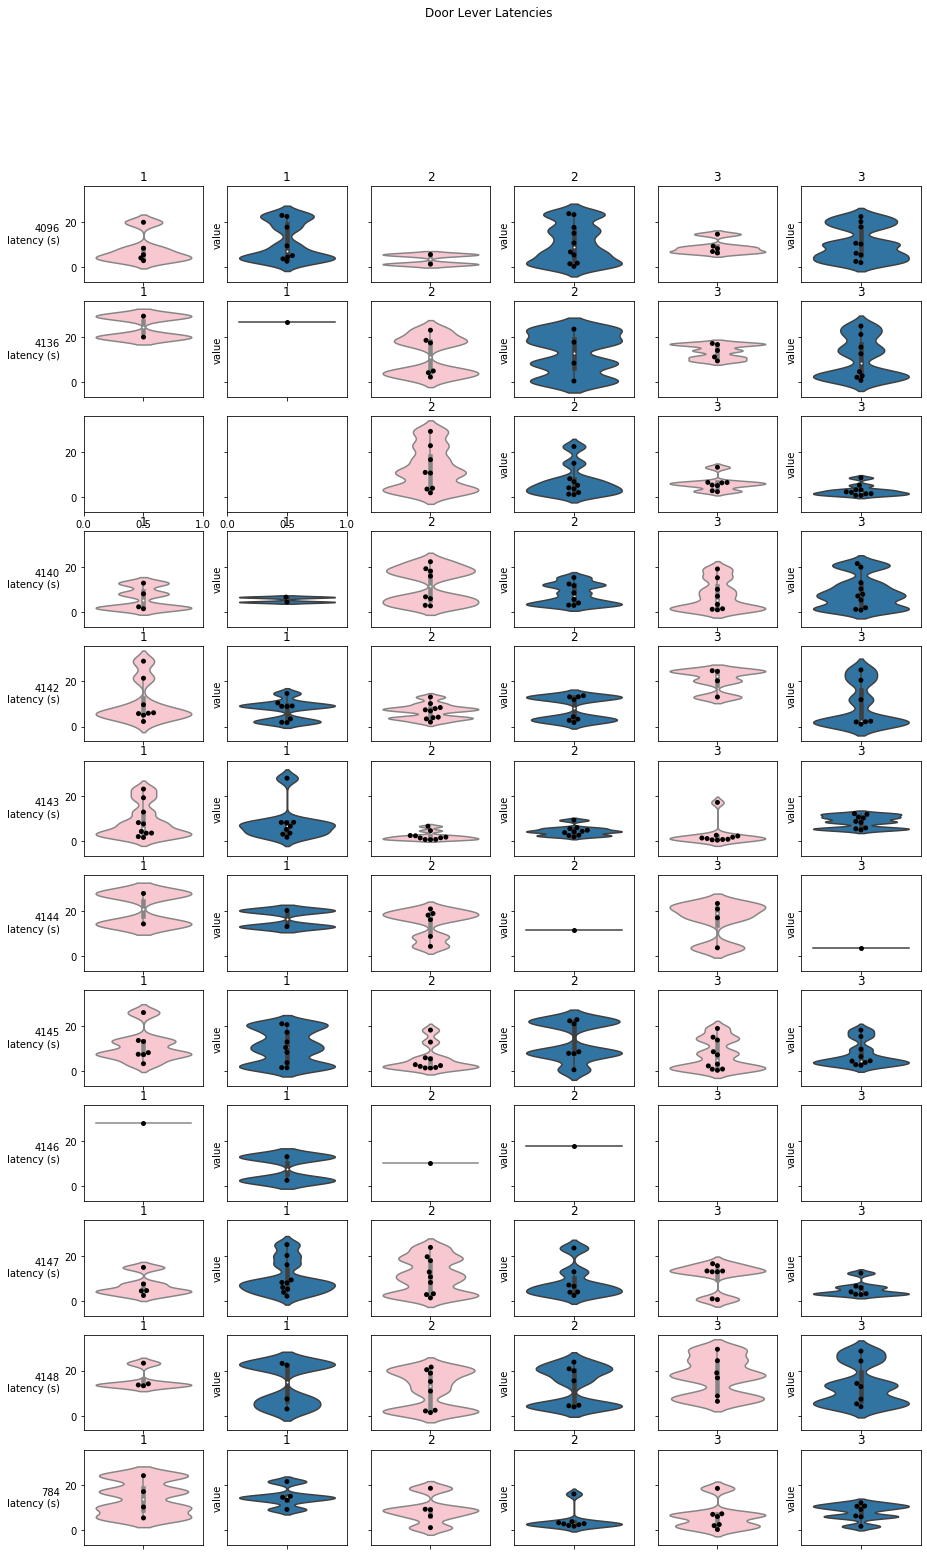

In [97]:
data = lon.metrics['door_1_lever_press_latency'].get_data("Door_shape")
data2 = lon.metrics['door_2_lever_press_latency'].get_data("Door_shape")

fig, axs = plt.subplots(ncols = 6, nrows = 12, figsize = (15,25), sharey = True)

fig.suptitle('Door Lever Latencies')
for i, ani in enumerate(data.keys()):
    for day in data[ani].keys():
        this_ax = axs[i][(int(day)-1)*2]
        this_ax_d2 = axs[i][(int(day)-1)*2+1]

        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax, violin_color = 'pink')
        df2 = data2[ani][day]
        _ = make_violin(df2, day = day, ax = this_ax_d2)
        if day == '1':
            this_ax.set_ylabel(f'{ani}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')

In [84]:
lon.metrics

{'food_lever_press_latency': <longi_class.Metric_by_round at 0x7faf33402100>,
 'pellet_latency': <longi_class.Metric_by_round at 0x7faf32ce4a30>,
 'door_1_lever_press_latency': <longi_class.Metric_by_round at 0x7faf32d49e50>,
 'door_2_lever_press_latency': <longi_class.Metric_by_round at 0x7faf32d498e0>,
 'latency_beam_break_door1': <longi_class.Metric_by_round at 0x7faf32d28d00>,
 'latency_beam_break_door2': <longi_class.Metric_by_round at 0x7faf32d28eb0>}